<a href="https://colab.research.google.com/github/MoriartyKang/DL/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [1]:
#필요한 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import numpy as np

### 2. 데이터 준비

In [2]:
!git clone https://github.com/taehojo/data.git #환자 정보 데이터 구글코랩에 저장

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",") #CSV 데이터 파일 불러오기

# X = Data_set[:,0:16] #환자의 상태 기록 X
# y = Data_set[:,16] #수술 1년후 사망/생존 여부 Y
X = Data_set[:,0:16]
Y = Data_set[:,16]


train_input, test_input, train_target, test_target = train_test_split(X, Y, random_state=42)

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 1.75 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
# 데이터 배열 변환
import pandas as pd
df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [4]:
df.shape

(470, 17)

### 3. 구조 결정

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

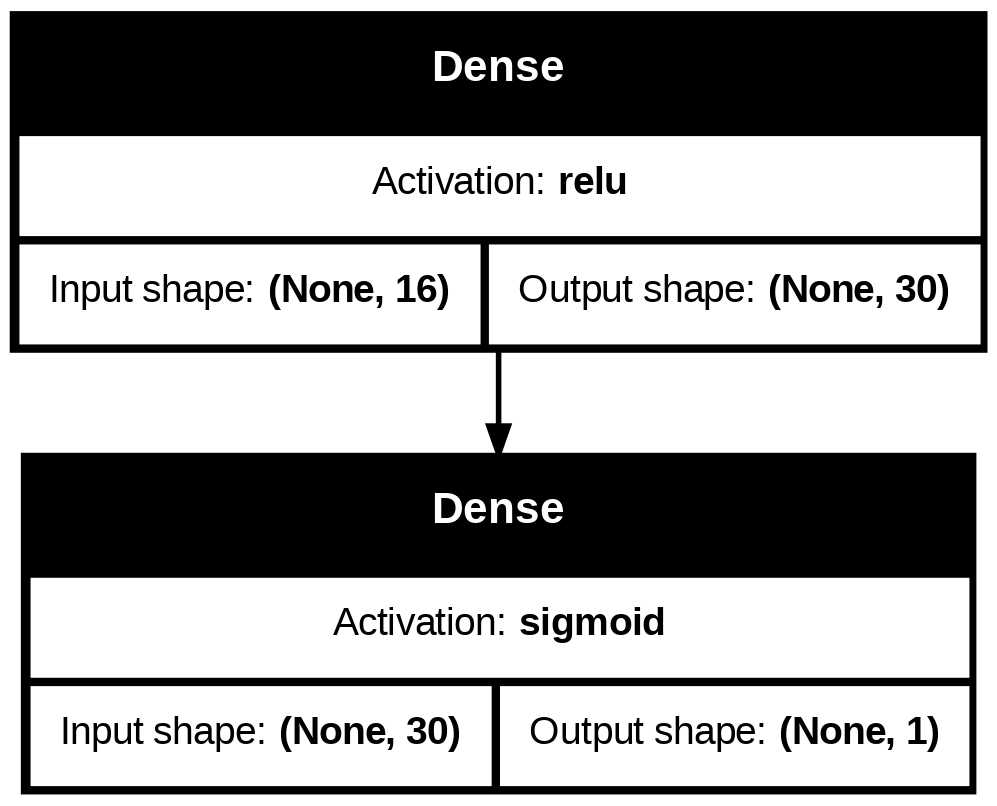

In [5]:
#딥러닝 모델의 구조 결정
# model = Sequential([
#  Input(shape=(16,))
# 완전 연결층 입력층 + 은닉층 역활
#  ,Dense(30, activation='relu')
#  ,Dense(1, activation= 'sigmoid')
# ])
model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True, show_layer_activations=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625 (6.35 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,084 (4.24 KB)

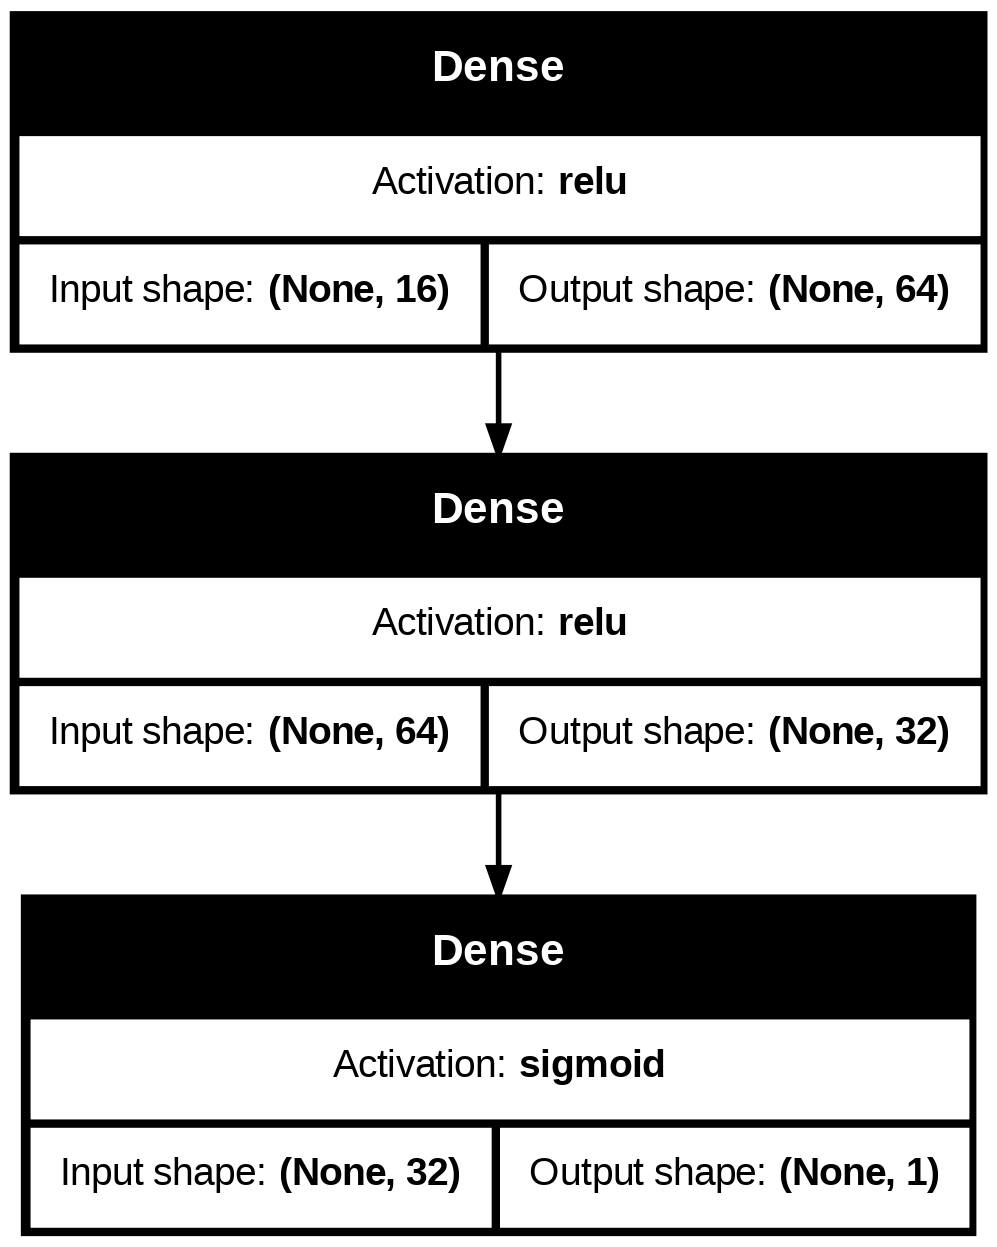

In [18]:
model2 = Sequential()
model2.add(Input(shape=(16,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation= 'relu'))
model2.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model2,show_shapes=True, show_layer_activations=True)

### 4. 모델 실행

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train_input, train_target, epochs=5, batch_size=16)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8523 - loss: 4.1087
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8535 - loss: 3.0205
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8644 - loss: 1.7924
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8274 - loss: 1.2318
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.4270


In [8]:
history.history

{'accuracy': [0.8664772510528564,
  0.8664772510528564,
  0.8664772510528564,
  0.8636363744735718,
  0.8579545617103577],
 'loss': [3.6084916591644287,
  2.6155405044555664,
  1.6014304161071777,
  0.7224783897399902,
  0.42804622650146484]}

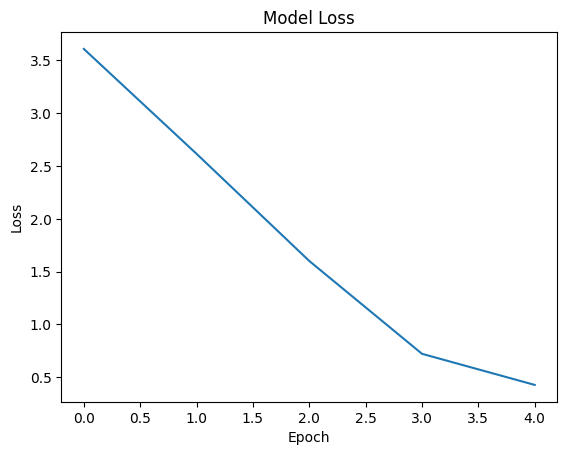

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch') # X값
plt.ylabel('Loss') # Y값
plt.title('Model Loss') # 타이틀
plt.show()

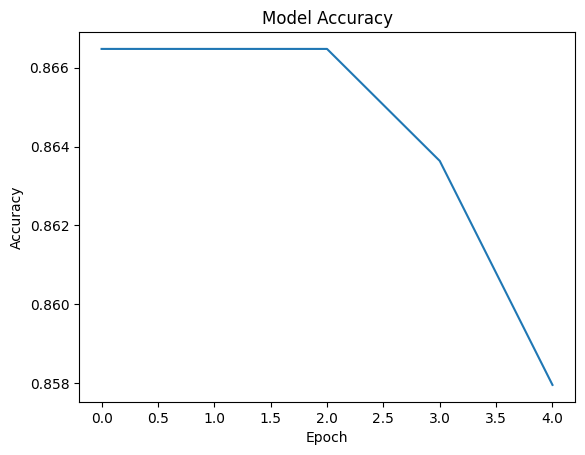

In [10]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [11]:
loss, accuracy = model.evaluate(test_input,test_target)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}") #정확도 값

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.7843 - loss: 0.5709
Test Loss: 0.5658
Test Accuracy: 0.7966


In [12]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(train_input, train_target, epochs=5, batch_size=16)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8726 - loss: 2.0962
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8594 - loss: 0.4794
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8734 - loss: 0.4014
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8773 - loss: 0.3870
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8573 - loss: 0.4230


In [13]:
history.history

{'accuracy': [0.8664772510528564,
  0.8664772510528564,
  0.8664772510528564,
  0.8664772510528564,
  0.8664772510528564],
 'loss': [1.6960238218307495,
  0.4389575719833374,
  0.40774935483932495,
  0.4099824130535126,
  0.40271493792533875]}

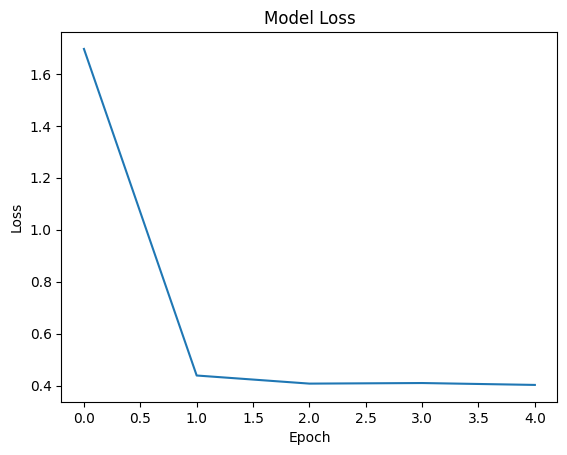

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch') # X값
plt.ylabel('Loss') # Y값
plt.title('Model Loss') # 타이틀
plt.show()

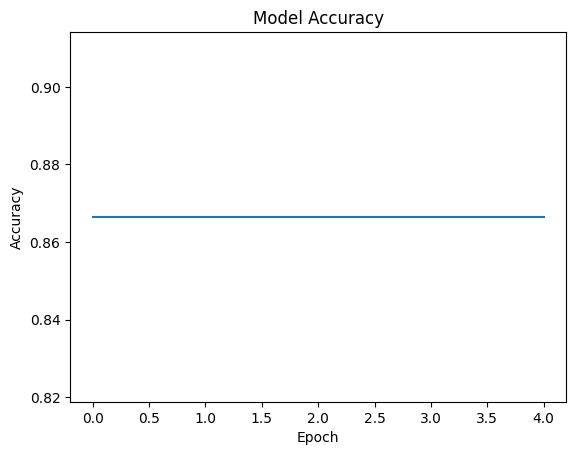

In [15]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [16]:
loss, accuracy = model2.evaluate(test_input,test_target)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}") #정확도 값

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.7991 - loss: 0.5341
Test Loss: 0.5300
Test Accuracy: 0.8051
